**Importing the necessary libraries.**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly 
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import scipy.stats as st
import seaborn as sns
%matplotlib inline

from datetime import datetime

import statsmodels.api as sm
    
from warnings import filterwarnings
filterwarnings("ignore")

**Uploading the dataset and naming it df.**

In [2]:
df = pd.read_csv("NetflixOriginals.csv", encoding=("ISO-8859-1") ,sep = ",")

**Lets take a look at our data.**

In [3]:
df

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese


**Using ".head()" allows us the see the first five row of our data. Five is the default number. We can specify this number by writing it in the paranthesis.**

In [4]:
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


**Using ".tail()" allows us the see the last five row of our data. Five is the default number. We can specify this number by writing it in the paranthesis.**

In [5]:
df.tail()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese
583,David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83,9.0,English


**Lets start our analysis according the given questions.**

# 1- [TR]Veri setine göre uzun soluklu filmler hangi dilde oluşturulmuştur?
#Görselleştirme yapınız. 
#[ENG]In which language were the long-run movies were created according to the dataset? Visualize it. 

For this question, first we need to determine the limit for long-run movies. Lets select 90 which equals to 1 and a half hour and find out which movies suits this spesification.

In [6]:
long_run = df[df["Runtime"] >= 120]
long_run

,Title,Genre,Premiere,Runtime,IMDB Score,Language
5,Drive,Action,"November 1, 2019",147,3.5,Hindi
7,The Last Days of American Crime,Heist film/Thriller,"June 5, 2020",149,3.7,English
9,Sardar Ka Grandson,Comedy,"May 18, 2021",139,4.1,Hindi
16,Ghost Stories,Horror anthology,"January 1, 2020",144,4.3,Hindi
23,The Girl on the Train,Thriller,"February 26, 2021",120,4.4,Hindi
...,...,...,...,...,...,...
562,The Trial of the Chicago 7,Drama,"October 16, 2020",130,7.8,English
564,Icarus,Documentary,"August 4, 2017",120,7.9,English
565,Marriage Story,Drama,"December 6, 2019",136,7.9,English
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English


Now that we have found the long run movies, we need to find in which language they are and how many are there for each language. For this, we are going to use ".groupby()"

In [7]:
long_run_language = long_run.groupby("Language")["Runtime"].count().sort_values(ascending=False)
long_run_language

Language
English                 48
Hindi                   11
Korean                   3
Japanese                 2
Marathi                  2
Spanish                  2
English/Akan             1
English/Japanese         1
English/Korean           1
Indonesian               1
Khmer/English/French     1
Portuguese               1
Name: Runtime, dtype: int64

For visualization, I will go with pie chart. 

In [8]:
long_run_pie = go.Figure(data=[go.Pie(labels=df[df["Runtime"]>=120]["Language"].value_counts().index, 
                             values=df[df["Runtime"]>=120]["Language"].value_counts().values, hole=.4)])
long_run_pie.update_layout(title="Languages of movies lasting more than 2 hours",title_x=0.5,legend_title="Languages",font=dict(family="Lucida Grande",size=15,color="sienna"))
long_run_pie.show()

# 2- [TR] 2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary'türünde çekilmiş filmlerin IMDB değerlerini bulup görselleştiriniz.
# [ENG] Find and visualize the IMDB values of the movies shot in the 'Documentary' genre between January 2019 and June 2020.

To do that, first we need to convert the data type of "Premiere" to datetime.

In [9]:
df["Premiere"] = pd.to_datetime(df.Premiere)
df["Year"] = df["Premiere"].dt.year

Now we can find the IMDB values of the movies shot in the 'Documentary' genre between January 2019 and June 2020.

In [10]:
between_date = (df['Premiere'] > '01-01-2019') & (df['Premiere'] <= '30-06-2020')
between = df.loc[between_date]
documentary_between = between[between.Genre == "Documentary"]
documentary_between.head(8)

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Year
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,2019
15,After the Raid,Documentary,2019-12-19,25,4.3,Spanish,2019
20,"Hello Privilege. It's Me, Chelsea",Documentary,2019-09-13,64,4.4,English,2019
30,After Maria,Documentary,2019-05-24,37,4.6,English/Spanish,2019
111,Ghosts of Sugar Land,Documentary,2019-10-16,21,5.5,English,2019
151,One Take,Documentary,2020-06-18,85,5.7,Thai,2020
263,A Tale of Two Kitchens,Documentary,2019-05-22,30,6.3,English/Spanish,2019
286,The Legend of Cocaine Island,Documentary,2019-03-29,87,6.3,English,2019


For visualization, lets use bar plot.

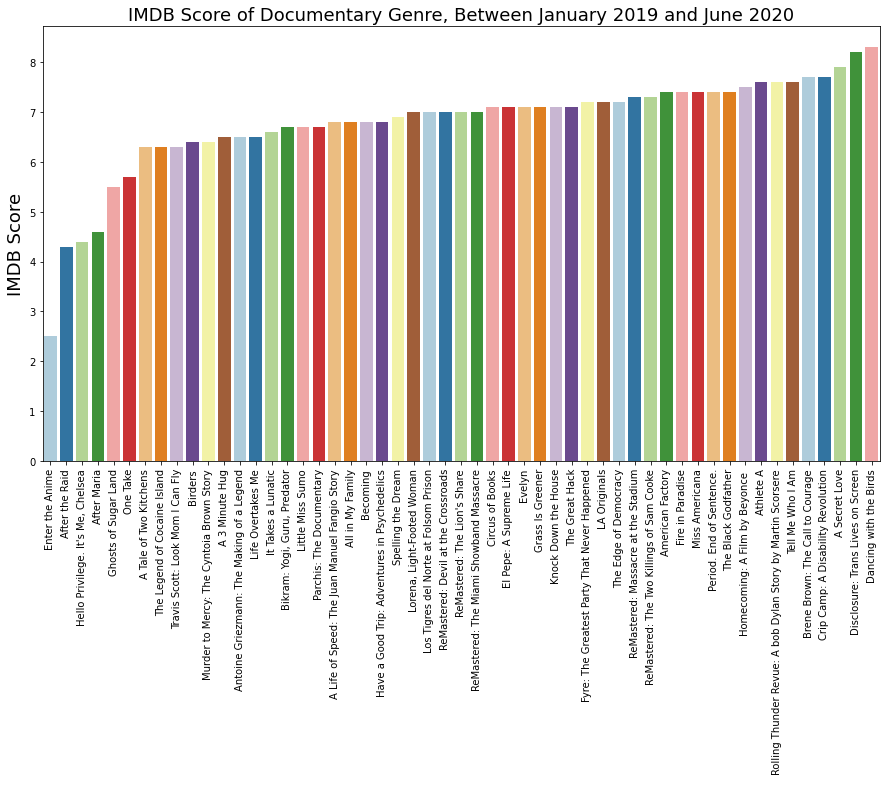

In [11]:
fig, ax = plt.subplots(figsize=(15,8))
rotation = sns.barplot(data = documentary_between, 
                       x="Title",
                       y="IMDB Score",
                       ax=ax,
                       palette="Paired")
for item in rotation.get_xticklabels():
    item.set_rotation(90)

plt.title("IMDB Score of Documentary Genre, Between January 2019 and June 2020", fontsize=18)
plt.xlabel("  ")
plt.ylabel("IMDB Score", fontsize=18)
plt.show()

# 3- [TR]İngilizce çekilen filmler içerisinde hangi tür en yüksek IMDB puanına sahiptir?
# [ENG]The genre of the English movie with the highest IMDB rating.

In [12]:
highest_imdb_English = df[df["Language"] == 'English']["IMDB Score"].idxmax()
df.iloc[highest_imdb_English:highest_imdb_English+1,]

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Year
583,David Attenborough: A Life on Our Planet,Documentary,2020-10-04,83,9.0,English,2020


# 4-[TR]'Hindi' Dilinde çekilmiş olan filmlerin ortalama 'Runtime' süresi nedir?
# [ENG]Average 'Runtime' of movies shot in 'Hindi'

In [13]:
Runtime_mean_Hindi = df[df.Language == "Hindi"]["Runtime"].mean()
print("Average 'Runtime' of movies shot in 'Hindi' is: ", Runtime_mean_Hindi)

Average 'Runtime' of movies shot in 'Hindi' is:  115.78787878787878


# 5-[TR]'Genre' Sütunu kaç kategoriye sahiptir ve bu kategoriler nelerdir? Görselleştirerek ifade ediniz.
# [ENG]How many "Genre" categories are there and which categories they are? Show it with visualization.

In [59]:
print(f"There are {df['Genre'].value_counts().count()} categories in the Genre feature.")

Genre = pd.DataFrame(columns = ["Title" , 'Count'])
Genre["Title"] = df["Genre"].value_counts().index
Genre["Count"] = df["Genre"].value_counts().values

fig = px.bar(Genre, x="Count", y="Title", orientation='h', width=1000, height=1000, color = "Title")
fig.show()

There are 115 categories in the Genre feature.


# 5-[TR]Veri setinde bulunan filmlerde en çok kullanılan 3 dili bulunuz.
# [ENG]Find the 3 most used language in the movies from the dataset.

In [15]:
Most_Used_Language = df["Language"].value_counts()[:3]
Most_Used_Language

English    401
Hindi       33
Spanish     31
Name: Language, dtype: int64

# 6-[TR]IMDB puanı en yüksek olan ilk 10 film hangileridir?
[ENG]

In [16]:
df.nlargest(n=10, columns = ["IMDB Score"])

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Year
583,David Attenborough: A Life on Our Planet,Documentary,2020-10-04,83,9.0,English,2020
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese,2020
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English,2018
578,Ben Platt: Live from Radio City Music Hall,Concert Film,2020-05-20,85,8.4,English,2020
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English,2018
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian,2015
576,Cuba and the Cameraman,Documentary,2017-11-24,114,8.3,English,2017
577,Dancing with the Birds,Documentary,2019-10-23,51,8.3,English,2019
571,13th,Documentary,2016-10-07,100,8.2,English,2016
572,Disclosure: Trans Lives on Screen,Documentary,2020-06-19,107,8.2,English,2020


# 7-[TR]IMDB puanı ile 'Runtime' arasında nasıl bir korelasyon vardır? İnceleyip görselleştiriniz.
[ENG]

In [17]:
df.corr()

,Runtime,IMDB Score,Year
Runtime,1.000000,-0.040896,0.069262
IMDB Score,-0.040896,1.000000,-0.141347
Year,0.069262,-0.141347,1.000000


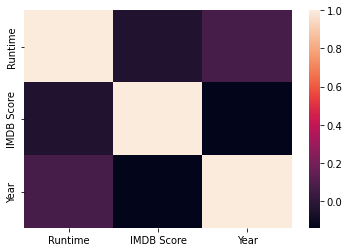

In [18]:
sns.heatmap(df.corr())

In [19]:
#Using Pearson Correlation
#cor = df.corr()
#print(cor,"\n")

#Correlation Heatmap
#plt.figure(figsize=(12,10))
#fig, ax = plt.subplots(figsize=(7,5))
#sns.heatmap(cor, annot=True, cmap=plt.cm.Reds,ax=ax)
#plt.title("Heatmap")
#plt.show()

In [20]:
np.corrcoef(df['Runtime'],df['IMDB Score'])

array([[ 1.        , -0.04089629],
       [-0.04089629,  1.        ]])

In [21]:
st.pearsonr(df['Runtime'],df['IMDB Score'])

(-0.0408962914207887, 0.32383932911461244)

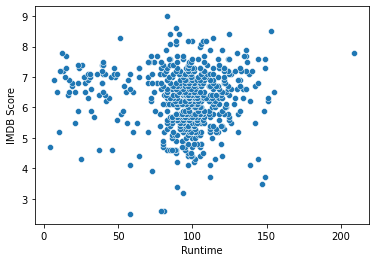

In [22]:
sns.scatterplot(df['Runtime'],df['IMDB Score'])

In [23]:
#sns.heatmap((df['Runtime'],df['IMDB Score']), cmap=sns.cubehelix_palette(as_cmap=True))

# 8-[TR]IMDB Puanı en yüksek olan ilk 10 'Genre' hangileridir? Görselleştiriniz.
[ENG]

In [24]:
df_IMDB_Genre = df.groupby("Genre").agg({"IMDB Score": "max"}).sort_values(by="IMDB Score", ascending=False)[0:10].reset_index()
df_IMDB_Genre 

,Genre,IMDB Score
0,Documentary,9.0
1,One-man show,8.5
2,Concert Film,8.4
3,Animation/Christmas/Comedy/Adventure,8.2
4,Drama,7.9
5,Animation / Short,7.8
6,Crime drama,7.8
7,Musical / Short,7.7
8,Making-of,7.7
9,War drama,7.7


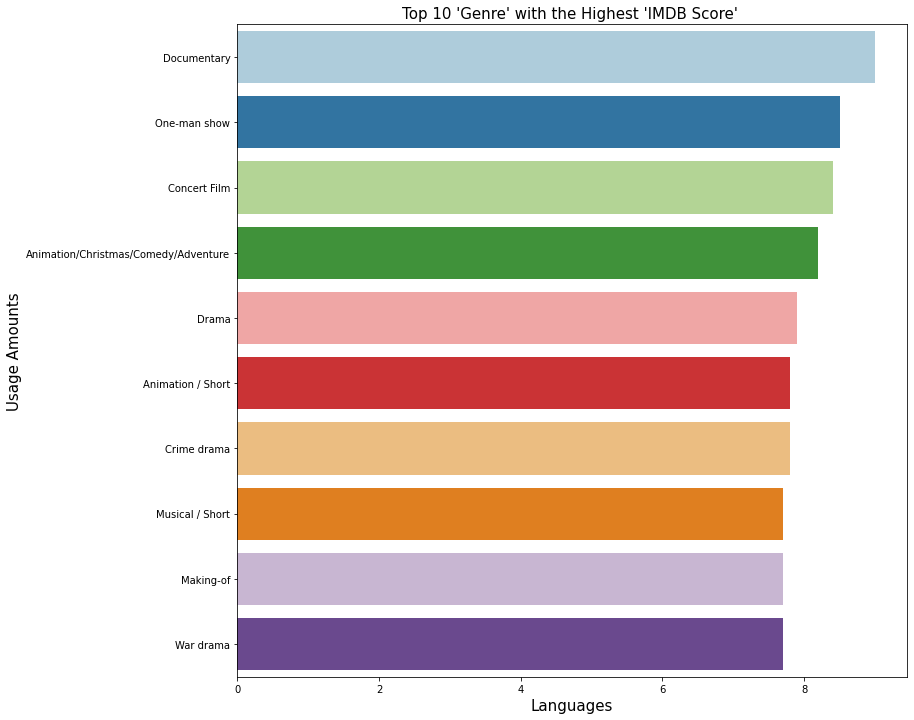

In [25]:
fig, ax = plt.subplots(figsize=(12,12))
sns.barplot(df_IMDB_Genre["IMDB Score"],
            df_IMDB_Genre["Genre"],
            palette = "Paired",
            ax=ax)

fontdict=dict(family="DejaVu Sans",
              size=15,
              color="black")
plt.title("Top 10 'Genre' with the Highest 'IMDB Score' ", fontdict=fontdict)                                               
plt.xlabel("Languages", fontdict=fontdict)
plt.ylabel("Usage Amounts", fontdict=fontdict)
plt.show()

# 9-[TR]'Runtime' değeri en yüksek olan ilk 10 film hangileridir? Görselleştiriniz.
[ENG]

In [26]:
Runtime_10 = df.nlargest(n=10, columns=['Runtime']).iloc[:,[0,3]]
Runtime_10

,Title,Runtime
561,The Irishman,209
328,Da 5 Bloods,155
581,Springsteen on Broadway,153
247,Citation,151
284,The Forest of Love,151
7,The Last Days of American Crime,149
509,Raat Akeli Hai,149
543,Ludo,149
194,Army of the Dead,148
5,Drive,147


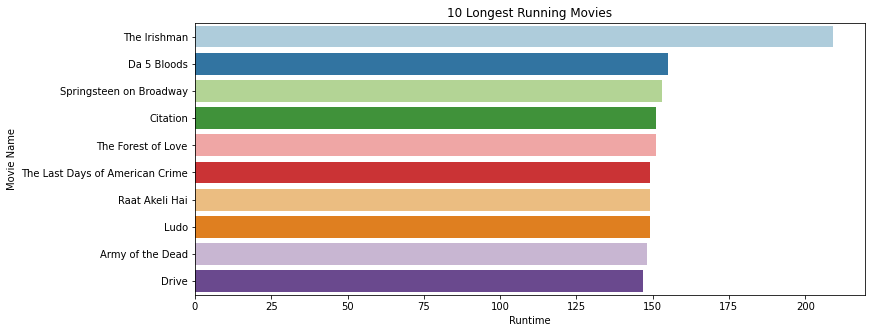

In [27]:
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(Runtime_10["Runtime"],
            Runtime_10["Title"],
            palette = "Paired",
            ax=ax)

plt.title("10 Longest Running Movies")
plt.ylabel("Movie Name")
plt.xlabel("Runtime")
plt.show()

# 10- [TR]Hangi yılda en fazla film yayımlanmıştır? Görselleştiriniz.
[ENG]

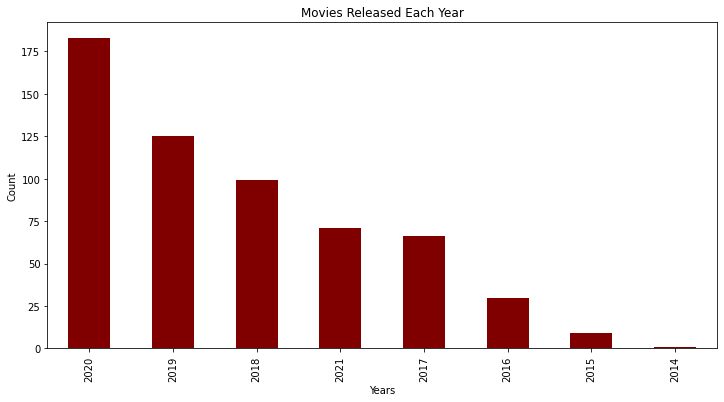

In [34]:
df['Premiere'].dt.year.value_counts(sort=True).plot(kind='bar', color='maroon', xlabel="Years", ylabel= "Count", title='Movies Released Each Year',figsize=(12,6))

In [47]:
Movie_Year = pd.DataFrame(columns = ["Film" , 'Year'])
Movie_Year["Film"] = df["Year"].value_counts().values
Movie_Year["Year"] = df["Year"].value_counts().index

# Pie Chart
fig = px.pie(Movie_Year, values='Film', names='Year', color_discrete_sequence=px.colors.sequential.RdBu,
             title="Total Movies for Each Year")
fig.show()

# 11-[TR]Hangi dilde yayımlanan filmler en düşük ortalama IMBD puanına sahiptir? Görselleştiriniz.
[ENG]